In [27]:
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact

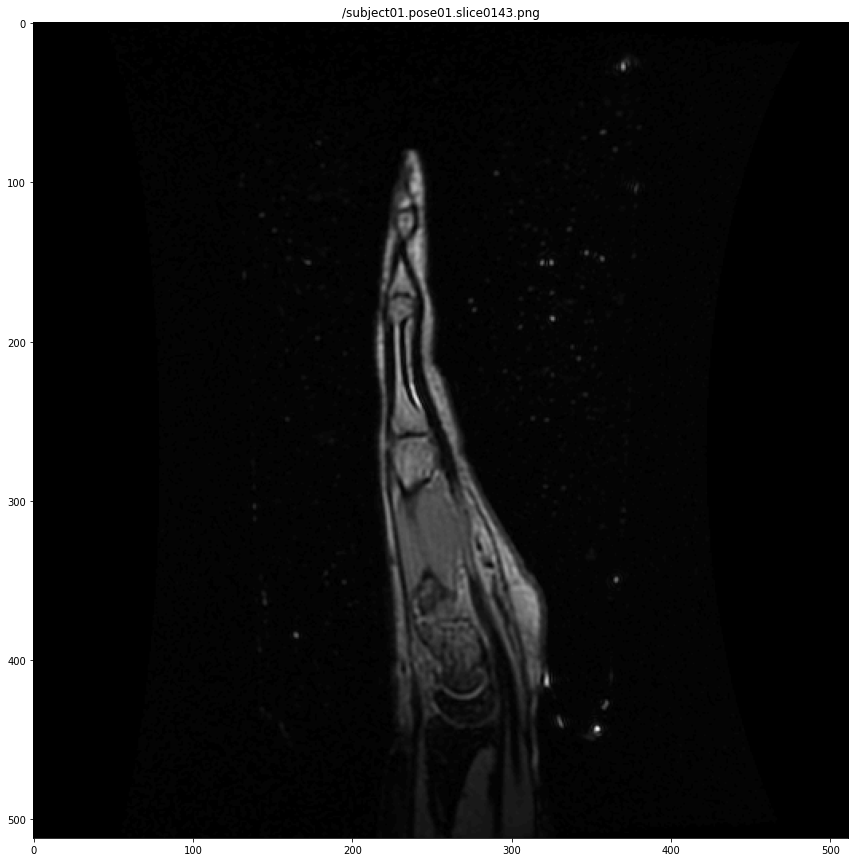

In [23]:
data_path = "C:/Users/ryota\Desktop/MRI_dataset/subject01"
pose      = "/pose01"
file_name = "/subject01.pose01.slice0143.png"

test_img_path = data_path + pose + file_name
test_img = cv2.imread(test_img_path, 0)

plt.figure(figsize=(15,15))
plt.title(file_name)
plt.imshow(test_img, cmap="gray")

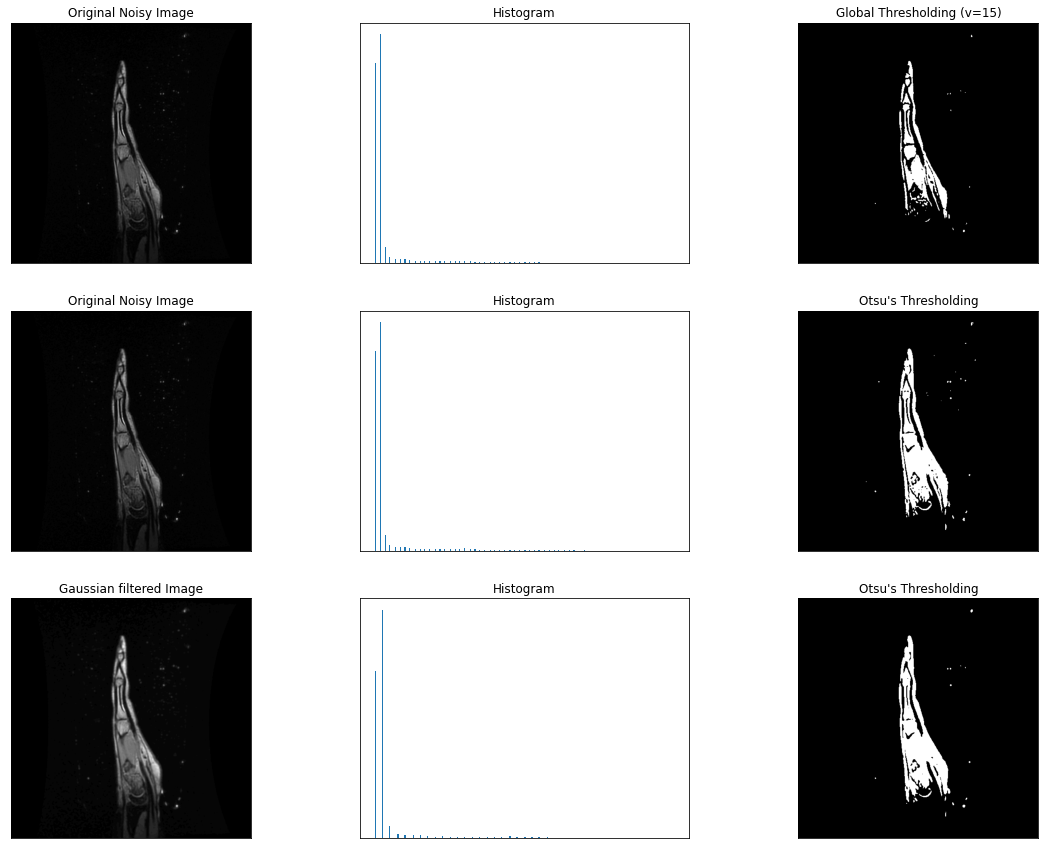

In [24]:
# global thresholding
ret1,th1 = cv2.threshold(test_img,15,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(test_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(test_img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [test_img, 0, th1,
          test_img, 0, th2,
          blur,     0, th3]
titles = ['Original Noisy Image',   'Histogram', 'Global Thresholding (v=15)',
          'Original Noisy Image',   'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image','Histogram', "Otsu's Thresholding"]

plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    
plt.show()

In [25]:
## http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html
## https://data-analysis-stats.jp/wp-content/uploads/2019/03/OpenCV-Python%E3%81%A7%E3%81%AE%E5%9B%B3%E5%BD%A2%E6%A4%9C%E5%87%BA%E3%80%81%E5%9B%B3%E5%BD%A2%E6%95%B0%E3%81%88%E3%82%8B.html
def contour_ditector(gray_img, epsilon_rate=0.001):
    contours, hierarchy = cv2.findContours(gray_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    rgb_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt, epsilon_rate*cv2.arcLength(cnt, True), True)
        rgb_img = cv2.drawContours(rgb_img, [approx], 0, (255,0,0), 1)
    return rgb_img

In [28]:
# global thresholding
@interact
def binarize(th: (0, 100, 1)):
    plt.figure(figsize=(20,15))
    _, th1 = cv2.threshold(test_img, th, 255,cv2.THRESH_BINARY)
    plt.subplot(1,2,1), plt.imshow(th1, cmap="gray")
    plt.xticks([]), plt.yticks([])
    
    indicated_img = contour_ditector(th1)
    plt.subplot(1,2,2), plt.imshow(indicated_img)
    plt.xticks([]), plt.yticks([])

interactive(children=(IntSlider(value=50, description='th'), Output()), _dom_classes=('widget-interact',))

(([], []), ([], []))

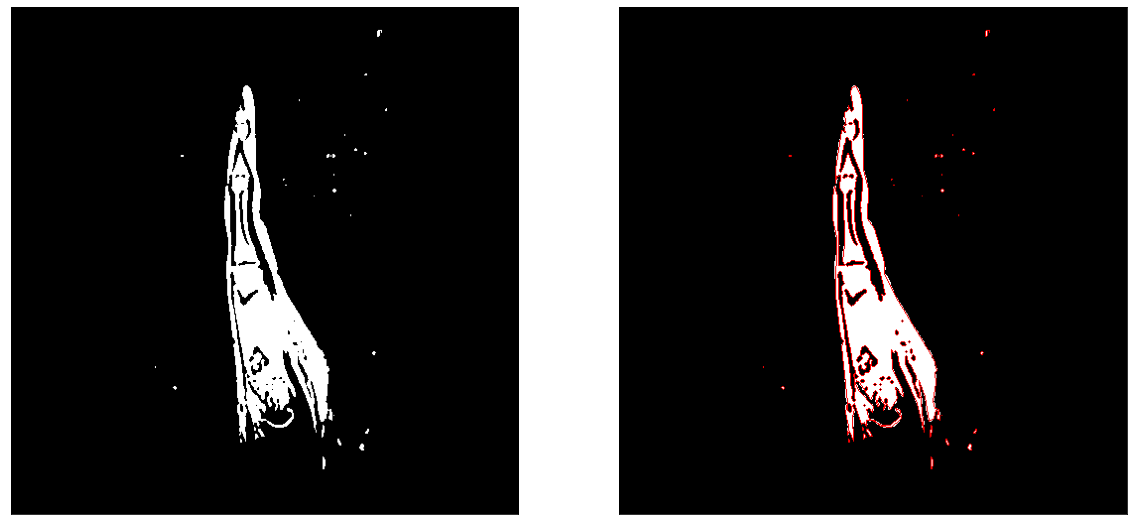

In [29]:
# Otsu's thresholding
_, th2 = cv2.threshold(test_img, 0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(20,15))
plt.subplot(1,2,1), plt.imshow(th2, cmap="gray")
plt.xticks([]), plt.yticks([])

indicated_img = contour_ditector(th2)
plt.subplot(1,2,2), plt.imshow(indicated_img)
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

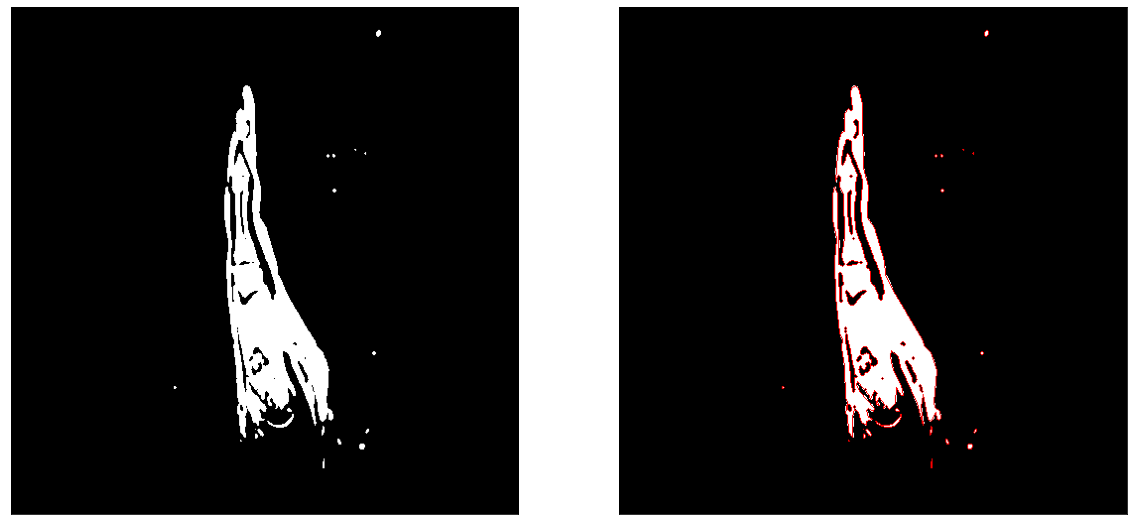

In [30]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(test_img,(5,5),0)
_, th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(20,15))
plt.subplot(1,2,1), plt.imshow(th3, cmap="gray")
plt.xticks([]), plt.yticks([])

indicated_img = contour_ditector(th3)
plt.subplot(1,2,2), plt.imshow(indicated_img)
plt.xticks([]), plt.yticks([])

### 普通にthreshold関数で輪郭抽出した方がよさそう

In [35]:
_, th1 = cv2.threshold(test_img, 15, 255,cv2.THRESH_BINARY)

# エッジを保存したまま平滑化する(cv2.bilateralFilter)
@interact
def bilateraling(d:(0,50,1), sigmaColor:(0,100,1), sigmaSpace:(0,100,1)):
    bil_img = cv2.bilateralFilter(th1, d, sigmaColor, sigmaSpace)
    
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1), plt.imshow(bil_img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    
    indicated_img = contour_ditector(bil_img)
    plt.subplot(1,2,2), plt.imshow(indicated_img)
    plt.xticks([]), plt.yticks([])

interactive(children=(IntSlider(value=25, description='d', max=50), IntSlider(value=50, description='sigmaColo…

In [41]:
# ガウシアンフィルタを使った平滑化
@interact
def bilateraling(kernel:(1,51,2)):
    blur_img = cv2.GaussianBlur(th1, (kernel,kernel), 0)
    
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1), plt.imshow(blur_img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    
    indicated_img = contour_ditector(blur_img)
    plt.subplot(1,2,2), plt.imshow(indicated_img)
    plt.xticks([]), plt.yticks([])

interactive(children=(IntSlider(value=25, description='kernel', max=51, min=1, step=2), Output()), _dom_classe…

In [42]:
# 中央値を使った平滑化
@interact
def bilateraling(kernel:(1,51,2)):
    median_img = cv2.medianBlur(th1, kernel)
    
    plt.figure(figsize=(20,15))
    plt.subplot(1,2,1), plt.imshow(median_img, cmap="gray")
    plt.xticks([]), plt.yticks([])
    
    indicated_img = contour_ditector(median_img)
    plt.subplot(1,2,2), plt.imshow(indicated_img)
    plt.xticks([]), plt.yticks([])

interactive(children=(IntSlider(value=25, description='kernel', max=51, min=1, step=2), Output()), _dom_classe…